In [1]:
import numpy as np                  # import numpy to make numerical computations.
import nltk                         # import NLTK to handle simple NL tasks like tokenization.
nltk.download("punkt")
from nltk.util import ngrams
from collections import Counter     # import the Counter module.
!pip3 install 'sacrebleu'           # install the sacrebleu package.
import sacrebleu                    # import sacrebleu in order compute the BLEU score.
import matplotlib.pyplot as plt     # import pyplot in order to make some illustrations.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: "'sacrebleu'"


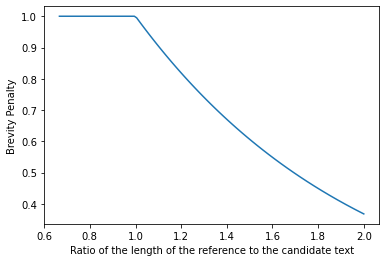

In [2]:
ref_length = np.ones(100)
can_length = np.linspace(1.5, 0.5, 100)
x = ref_length / can_length
y = 1 - x
y = np.exp(y)
y = np.minimum(np.ones(y.shape), y)

# Code for in order to make the plot
fig, ax = plt.subplots(1)
lines = ax.plot(x, y)
ax.set(
    xlabel="Ratio of the length of the reference to the candidate text",
    ylabel="Brevity Penalty",
)
plt.show()


In [3]:
def brevity_penalty(reference, candidate):
    ref_length = len(reference)
    can_length = len(candidate)

    # Brevity Penalty
    if ref_length > can_length:
        BP = 1
    else:
        penalty = 1 - (ref_length / can_length)
        BP = np.exp(penalty)

    return BP


In [4]:
def clipped_precision(reference, candidate):
    """
    Bleu score function given a original and a machine translated sentences
    """

    clipped_precision_score = []

    for i in range(1, 5):
        candidate_n_gram = Counter(
            ngrams(candidate, i)
        )  # counts of n-gram n=1...4 tokens for the candidate
        reference_n_gram = Counter(
            ngrams(reference, i)
        )  # counts of n-gram n=1...4 tokens for the reference

        c = sum(
            reference_n_gram.values()
        )  # sum of the values of the reference the denominator in the precision formula

        for j in reference_n_gram:  # for every n_gram token in the reference
            if j in candidate_n_gram:  # check if it is in the candidate n-gram

                if (
                    reference_n_gram[j] > candidate_n_gram[j]
                ):  # if the count of the reference n-gram is bigger
                    # than the corresponding count in the candidate n-gram
                    reference_n_gram[j] = candidate_n_gram[
                        j
                    ]  # then set the count of the reference n-gram to be equal
                    # to the count of the candidate n-gram
            else:

                reference_n_gram[j] = 0  # else reference n-gram = 0

        clipped_precision_score.append(sum(reference_n_gram.values()) / c)

    weights = [0.25] * 4

    s = (w_i * np.log(p_i) for w_i, p_i in zip(weights, clipped_precision_score))
    s = np.exp(np.sum(s))
    return s

In [5]:
def bleu_score(reference, candidate):
    BP = brevity_penalty(reference, candidate)
    precision = clipped_precision(reference, candidate)
    return BP * precision

In [6]:
# Loading the raw data
wmt19news_src = open("src.txt", "rU")
wmt19news_src_1 = wmt19news_src.read()
wmt19news_src.close()
wmt19news_ref = open("ref.txt", "rU")
wmt19news_ref_1 = wmt19news_ref.read()
wmt19news_ref.close()
wmt19news_can = open("predict.txt", "rU")
wmt19news_can_1 = wmt19news_can.read()
wmt19news_can.close()

# Tokenizing the raw data
tokenized_corpus_src = nltk.word_tokenize(wmt19news_src_1.lower())
tokenized_corpus_ref = nltk.word_tokenize(wmt19news_ref_1.lower())
tokenized_corpus_cand = nltk.word_tokenize(wmt19news_can_1.lower())

<ipython-input-6-6a52a265018c>:2: DeprecationWarning: 'U' mode is deprecated
  wmt19news_src = open("src.txt", "rU")
<ipython-input-6-6a52a265018c>:5: DeprecationWarning: 'U' mode is deprecated
  wmt19news_ref = open("ref.txt", "rU")
<ipython-input-6-6a52a265018c>:8: DeprecationWarning: 'U' mode is deprecated
  wmt19news_can = open("predict.txt", "rU")


In [10]:
print("ISL source text:")
print("\n")
print(f"{wmt19news_src_1[0:170]} -> {tokenized_corpus_src[0:30]}")
print("\n")
print("English reference translation:")
print("\n")
print(f"{wmt19news_ref_1[0:219]} -> {tokenized_corpus_ref[0:35]}")
print("\n")
print("English machine translation:")
print("\n")
print(f"{wmt19news_can_1[0:199]} -> {tokenized_corpus_cand[0:29]}")

ISL source text:


good morning
bank where
i sing look me
nine morning
Food want
Food want
I understand
I understand before
I understand not
you go day now where
iphone seven zero thousand
 -> ['good', 'morning', 'bank', 'where', 'i', 'sing', 'look', 'me', 'nine', 'morning', 'food', 'want', 'food', 'want', 'i', 'understand', 'i', 'understand', 'before', 'i', 'understand', 'not', 'you', 'go', 'day', 'now', 'where', 'iphone', 'seven', 'zero']


English reference translation:


Good morning
Where is the bank? 
Look at me singing!
It is 9 in the morning.
I want food.
I am hungry.
I am understanding.
I understood.
I am not understanding.
where are you going today?
This iphone costs seventy thous -> ['good', 'morning', 'where', 'is', 'the', 'bank', '?', 'look', 'at', 'me', 'singing', '!', 'it', 'is', '9', 'in', 'the', 'morning', '.', 'i', 'want', 'food', '.', 'i', 'am', 'hungry', '.', 'i', 'am', 'understanding', '.', 'i', 'understood', '.', 'i']


English machine translation:


it is in the 

In [11]:
print(
    "Results reference versus candidate 1 our own BLEU implementation: ",
    round(bleu_score(tokenized_corpus_ref, tokenized_corpus_cand) * 100, 1),
)

Results reference versus candidate 1 our own BLEU implementation:  31.5


<ipython-input-4-e8e9ddf8de19>:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  s = np.exp(np.sum(s))


In [12]:
print(
    "Results reference versus candidate 1 sacrebleu library BLEU: ",
    round(sacrebleu.corpus_bleu(wmt19news_ref_1, wmt19news_can_1).score, 1),
)

Results reference versus candidate 1 sacrebleu library BLEU:  20.6
